# PHYS250 assignment 2: random walkers

### Introduction
For the first assingment, you evaluated multiple algorithms and generation parameters for random numbers and performed tests of those random numbers for uniformity and perhaps intrinsic randomness. The purpose of that assignment was to gain familiarity with basic (python) syntax, libraries, and functions, to practice using GitHub as a development tool for your software, and to begin to establish your own approach to programming for a specific purpose.

For your second assignment, we're going to elaborate on some of these skills, focus a bit more on quantitative analysis of important physical and emergent phenomena, and do a bit more plotting, graphing, and visualizing.

### Assignment Details
Specifically, I want you to use the random walker discussion and the examples (much of which is included in this repository as a starting point) to evaluate properties of random walks in more detail. 

1. Plot the average and RMS displacement (length of walk) for a one-dimensional random walk with a uniform stepsize.
1. Do the same for a 2D random walk.
1. Measure the distribution of endpoints of a random walk in 2D with a number of steps = `Nsteps`, where `Nsteps = 10^y` and `y=0, 1, 2, 4, 6`.
1. Do a scatter plot of the endpoints of 10000 random walks with `Nsteps = 1, 10`, superimposed on the same plot with large `Nsteps` (and justify what large means)
1. Write a routine that plots a histogram of the endpoints of `W` 2D random walks with `Nsteps` steps and 50 bins, along with the prediction given by a normal, or Gaussian, distribution for `x` in `(−3sigma, 3sigma)`, where `sigma=sqrt(Nsteps)xL` (where `L` is the fixed length of each step).
1. Do a histogram with `W = 10000` and `N = 1, 2, 3, 5`. How quickly does the Gaussian distribution become a good approximation to the radom walk? How are you quanitfying "good"?
1. Compare your measurement to the expectation given by the Gaussian and compute a chi-squared. Assess how well your measurement matches the expectation.

*Optional*
1. Update the model to perform random walks that allow for a uniform direction in angle (i.e. not just `+/- 1` in `x,y`)
1. Extrapolate to 3D
1. Randomize the length of the steps taken.
1. Add an external *force* or a *field* that creates a preferred direction.


## Example code

As a possible starting point and guide for what I want you to implement and evaluate in this assignment, let's setup some of the same sorts of functions that we used in the examples in class.

First, as usual, we import the most important libraries at the outset.

In [1]:
# Import the usual numpy and matplotlib libraries for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rng
from mpl_toolkits.mplot3d import Axes3D


Here, again, I suggest specifying the primary variables and their assigned values for ease of use in the code that follows.

In [2]:
# define the number of steps 
nsteps      = 100000         # "Full" simulation
nsteps_test = 100            # "Fast" simulation
iterations = 10000           # Number of walks done to test 

## Key Functions
Here we build our step generators, our walk builder, and the functions that use these functions to generate our statistics.

In [3]:
# Function to construct a random array of steps
def randomSteps(num_steps,num_d):
    '''
    This function returns the steps generated using random
    number generators, possibly choosing among a list of options
    given as an argument.
    '''
    
    # This just initializes a numpy array
    N = num_steps
    d= num_d
    L = 1
    steps = np.random.randint(0,2,(N,d))*2 -1
    # Always return a value, unless you're just plotting
    return steps
   
# Function to build a random walk out of the array of steps    
def randomStepsSpecial(num_steps,num_d):
    '''
    This function returns the steps generated using random
    number generators, possibly choosing among a list of options
    given as an argument.
    '''
    
    # This just initializes a numpy array
    N = num_steps
    d= num_d
    L = 1
    #steps = np.random.randint(0,2,(N,d))*2 -1
    steps = np.zeros((N,d))
    for i in range(N):
        for j in range(d):
            if j == 0:
                steps[i][j]= 2*(rng.randint(0,2)-1/2)*L + (L/2)*np.cos(np.pi*i/(N/6))*(2*i/N) #This section creates a bias that makes it want to draw a spiral
            if j == 1:
                steps[i][j]= 2*(rng.randint(0,2)-1/2)*L - (L/2)*np.sin(np.pi*i/(N/6))*(2*i/N)
            elif j == 2:
                steps[i][j] =2*(rng.randint(0,2)-1/2)*L + (L/2)*np.sin(np.pi*i/(N/6))*(2*i/N) #This oscillates for the majority of the time, but it increases in magnitude as time goes on. Together these effects create a diagonal spiral.
    # This function takes N steps in each dimension. Thus, total_steps = num_steps * d. This is important for the RMS values.
    
    # Always return a value, unless you're just plotting
    return steps
   
# Function to build a random walk out of the array of steps    
def buildRandomWalk(steps):
    '''
    If you take this approach, you will want to pass the options 
    from the above steps function in order to construct the correct
    walk.
    '''
    
    # Get the steps
    steps = steps
    
    # Build the walk
    walk = np.cumsum(steps, axis=0)
    
    return walk
def manyWalks(num_steps,dimension,iterations):
    walks  = np.array([buildRandomWalk(randomSteps(num_steps,dimension)) for i in range(iterations)])
    return walks
def manyWalksSpecial(num_steps,dimension,iterations):
    walks  = np.array([buildRandomWalk(randomStepsSpecial(num_steps,dimension)) for i in range(iterations)])
    return walks
def walkDisplacementSquared(EndOfWalk):
    displacement = 0
    for walkdir in EndOfWalk:
        displacement += walkdir**2
    return displacement

## Question 1
For this question, we shall use our random walker to find average and RMS displacement for a 1-dimensional walk of a walk of N steps.

In [4]:

def AverageEnd(n_steps,dimensions,iterations):
    average = np.zeros(dimensions)
    walks = manyWalks(n_steps,dimensions,iterations)
    for i in range(iterations):
        average += walks[i][-1]
    average = average/iterations
    return average
def RMS(n_steps,dimensions,iterations):
    averageRMS = 0
    walks = manyWalks(n_steps,dimensions,iterations)
    for i in range(iterations):
        averageRMS += (walkDisplacementSquared(walks[i][-1]))
    averageRMS = np.sqrt(averageRMS/iterations)
    return averageRMS

What we shall do is that we shall ask the question, what is RMS(N) and average(N)? That is, given N steps, what is the root mean square and what is the average displacement by the end? If we are to trust our statistics, it should be that RMS(N) = np.sqrt(N) and that average(N) should be zero, or at the very least very small and independent of N.

In [5]:
#Test Average Displacement and RMS for d=1
ntest = 150
averageRMSlist = [RMS(i+1,1,10000) for i in range(ntest-1)]
stepvalues = [i+1 for i in range(ntest - 1)]


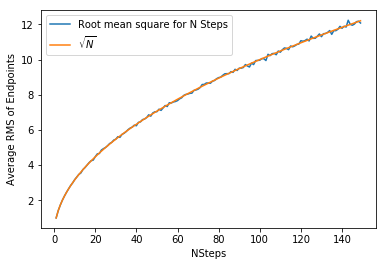

In [6]:
fig = plt.figure()
plt.plot(stepvalues,averageRMSlist,label = "Root mean square for N Steps")
plt.plot(stepvalues,np.sqrt(stepvalues),label = "$\\sqrt{N}$")
plt.xlabel('NSteps')
plt.ylabel('Average RMS of Endpoints')
plt.legend()
plt.show()

In [7]:
averageDisplacementList = [AverageEnd(i+1,1,10000) for i in range(ntest -1)]
stepvalues = [i+1 for i in range(ntest - 1)]

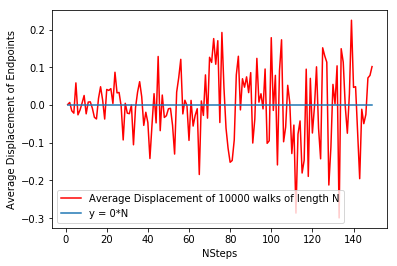

In [8]:

plt.plot(stepvalues,averageDisplacementList,'red', label = "Average Displacement of 10000 walks of length N")

plt.plot(stepvalues,np.zeros(ntest-1),label = "y = 0*N")
plt.xlabel('NSteps')
plt.ylabel('Average Displacement of Endpoints')
plt.legend()
plt.show()

From these graphs, we see that RMS(N) perfectly is almost perfectly modelled by sqrt(N), and that averageDisplacment(N) is very small (<.5 up to N =150) and it doesn't increase as N becomes large.

## Problem 2
We shall show that using dimension as an argument, creating the same sort of statistics is the same as before after changing d = 1 to d=2 in our arguments. Important to note is that our walker takes N steps in each direction, such that for d=2 it takes a total of 2N steps. This implies that RMS(N) should be modelled by sqrt(2N)

In [9]:
#Test Average Displacement and RMS for d=2
ntest = 100
averageRMSlist = [RMS(i+1,2,10000) for i in range(ntest-1)]
stepvalues = [i+1 for i in range(ntest - 1)]


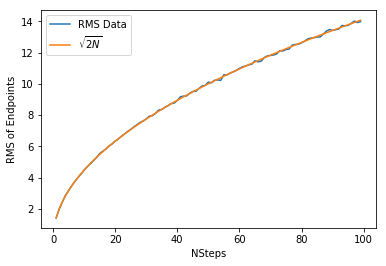

In [10]:
plt.plot(stepvalues,averageRMSlist, label = 'RMS Data')

plt.plot(stepvalues,np.sqrt(2)*np.sqrt(stepvalues),label = "$\\sqrt{2N}$")
plt.xlabel('NSteps')
plt.ylabel('RMS of Endpoints')
plt.legend()
plt.show()

In [11]:
averageDisplacementList = np.array([AverageEnd(i+1,2,10000) for i in range(ntest -1)])
stepvalues = [i+1 for i in range(ntest - 1)]

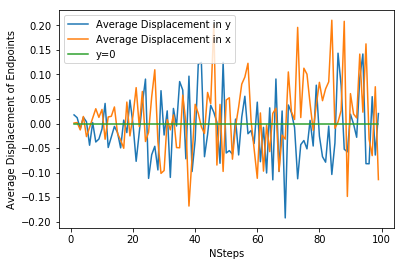

In [12]:
plt.plot(stepvalues,averageDisplacementList[:,1], label = 'Average Displacement in y')
plt.plot(stepvalues,averageDisplacementList[:,0],label = "Average Displacement in x")
plt.plot(stepvalues,np.zeros(ntest-1),label = 'y=0')
plt.xlabel('NSteps')
plt.ylabel('Average Displacement of Endpoints')
plt.legend()
plt.show()


Again, from this result, we see that RMS(N) follows sqrt(2N) almost perfectly, and that since x,y are orthogonal, we get the expected one dimensional result in both directions.

## Problem 3
For this problem, we are going to measure the distribution of the magnitudes of walks for different scales of NSteps. In the beginning, there are simply not enough endpoints for a walk to go to such that we can not generate a smooth curve. However, as NSteps becomes large, we begin to generate plots that peak at approximately sqrt(2N). 

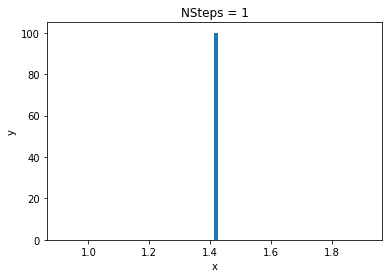

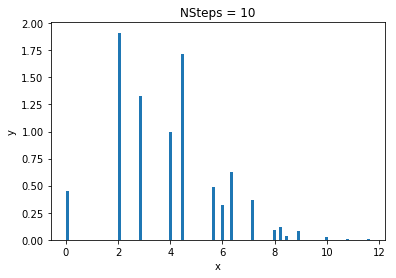

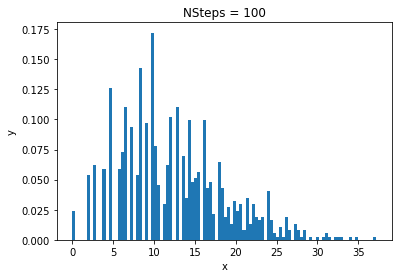

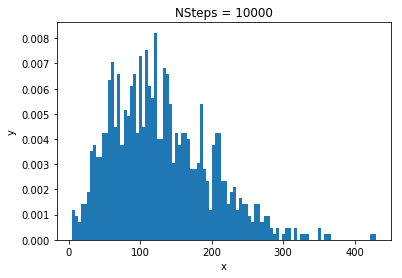

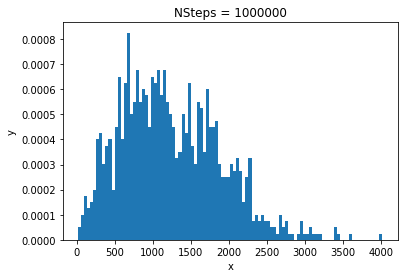

In [13]:
yval = [0,1,2,4,6]
iterations = 1000
for y in yval:
    NSteps = 10**y
    walks = manyWalks(NSteps,2,iterations)
    endpoints = [walks[i][-1] for i in range(iterations)]
    walkMagsSquared = [walkDisplacementSquared(endpoints[i]) for i in range(iterations)]
    walkMags = np.sqrt(walkMagsSquared)
    num_bins = 100
    bin_values,bin_edges,patches = plt.hist(walkMags,num_bins,density = True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('NSteps = ' + str(NSteps))
    plt.show()
    

## Problem 4


For this problem, we do a scatter plot of the endpoints of walks of various lengths. We super impose these on top of the plot for walks of length 100000. I decided that this number is large enough because it creates a dense area of points within r = sqrt(2*100000) ~ 500. This area is large enough such that all of our small plots are encapsulated by the dense area of these points.

In [14]:
iterations = 10000

NSteps = 10**5
step510walks = manyWalks(NSteps,2,iterations)
endpoints510step = np.array([step510walks[i][-1] for i in range(iterations)])

In [15]:
NSteps = 10**0
step010walks = manyWalks(NSteps ,2,iterations)
endpoints010step = np.array([step010walks[i][-1] for i in range(iterations)])
NSteps = 10**1
step110walks = manyWalks(NSteps ,2,iterations)
endpoints110step = np.array([step110walks[i][-1] for i in range(iterations)])
NSteps = 10**2
step210walks = manyWalks(NSteps ,2,iterations)
endpoints210step = np.array([step210walks[i][-1] for i in range(iterations)])
NSteps = 10**3
step310walks = manyWalks(NSteps ,2,iterations)
endpoints310step = np.array([step310walks[i][-1] for i in range(iterations)])
NSteps = 10**4
step410walks = manyWalks(NSteps ,2,iterations)
endpoints410step = np.array([step410walks[i][-1] for i in range(iterations)])

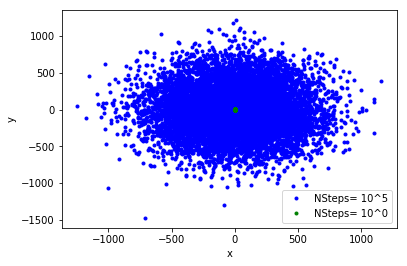

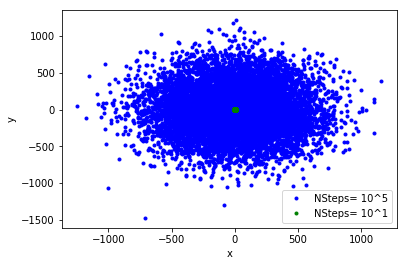

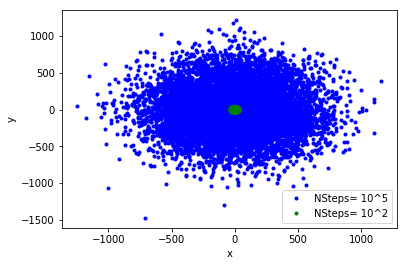

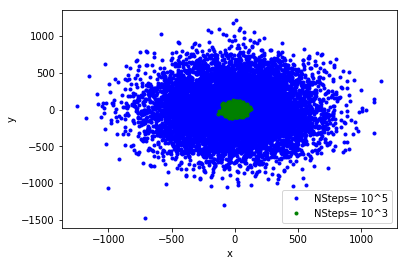

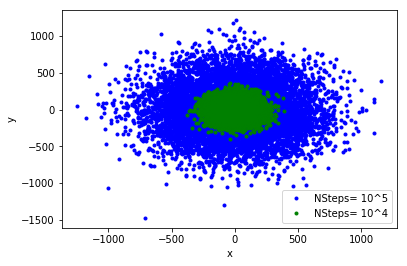

In [16]:
plt.plot(endpoints510step[:,0],endpoints510step[:,1],"b.",label='NSteps= 10^5')
plt.plot(endpoints010step[:,0],endpoints010step[:,1],"g.",label='NSteps= 10^0')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.plot(endpoints510step[:,0],endpoints510step[:,1],"b.",label='NSteps= 10^5')
plt.plot(endpoints110step[:,0],endpoints110step[:,1],"g.",label='NSteps= 10^1')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(endpoints510step[:,0],endpoints510step[:,1],"b.",label='NSteps= 10^5')
plt.plot(endpoints210step[:,0],endpoints210step[:,1],"g.",label='NSteps= 10^2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.plot(endpoints510step[:,0],endpoints510step[:,1],"b.",label='NSteps= 10^5')
plt.plot(endpoints310step[:,0],endpoints310step[:,1],"g.",label='NSteps= 10^3')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.plot(endpoints510step[:,0],endpoints510step[:,1],"b.",label='NSteps= 10^5')
plt.plot(endpoints410step[:,0],endpoints410step[:,1],"g.",label='NSteps= 10^4')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Problem 5,6,7
In this problem, we begin to create a method of visualizing the spread of the endpoints over the plane. We then compare this spread to the spread created by a gaussian with the same variance. Using this spread, we are also able to create some notion of "fit" with respect to the gaussian by computing a chi^2 and 

In [19]:
def gaussian(x,u,sigma):
        return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(1/2) *((x-u)/sigma)**2)
def TwoDimensionalGaussian(x,y,u,sigma):
    return gaussian(x,u,sigma)*gaussian(y,u,sigma)

def TwoDHistogram(W,num_steps):
    L =1
    walks = manyWalks(num_steps,2,W)
    endpoints = np.array([walks[i][-1] for i in range(W)])
    num_bins = 50
    bin_values, bin_edges,patches,image = plt.hist2d(endpoints[:,0],endpoints[:,1],num_bins,normed = True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar()
    plt.title('Distribution of endpoints for NSteps ='+ str(num_steps))
    sigma = np.sqrt(num_steps)
    analytical_gaussian = bin_values*0
    for i in range(len(bin_edges)-1):
        for j in range(len(bin_edges)-1):
            analytical_gaussian[i][j] = TwoDimensionalGaussian((bin_edges[i] + bin_edges[i+1])/2, (bin_edges[j] + bin_edges[j+1])/2, 0,sigma)
    x = np.linspace(-3*sigma, 3*sigma,1000)
    y = np.linspace(-3*sigma, 3*sigma,1000)

    x, y = np.meshgrid(x, y)
    z = (1/(2*np.pi*sigma*sigma) * np.exp(-(x**2/(2*sigma**2)
         + y**2/(2*sigma**2))))
    plt.show()
    plt.contourf(x, y, z, cmap='Blues')
    plt.xlabel('x')
    plt.title('Gaussian model for NSteps ='+ str(num_steps))
    plt.ylabel('y')
    plt.colorbar()
    plt.show()
    chi2 = 0
    for i in range(len(bin_values)):
        for j in range(len(bin_values)):
            chi2 += (bin_values[i][j] - analytical_gaussian[i][j])**2/analytical_gaussian[i][j]
            
    print("Chi^2 = " + str(chi2) + " for NSteps = " +  str(num_steps))

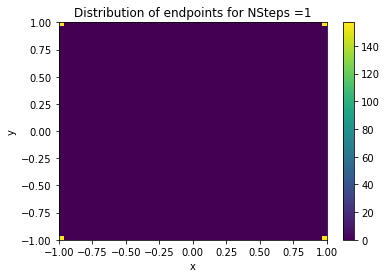

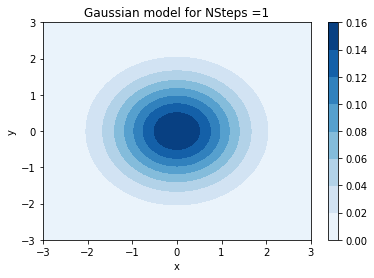

Chi^2 = 1602211.8754004964 for NSteps = 1


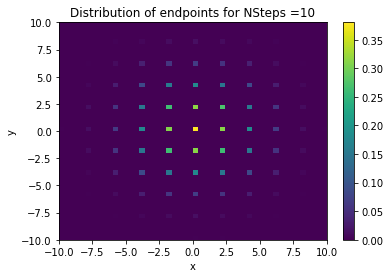

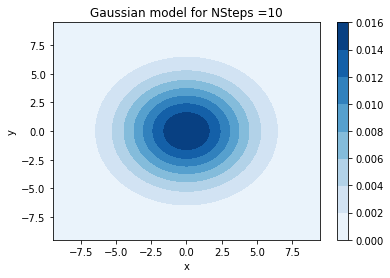

Chi^2 = 152.0537869783495 for NSteps = 10


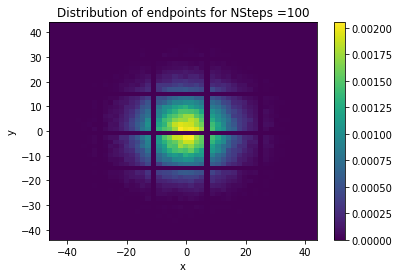

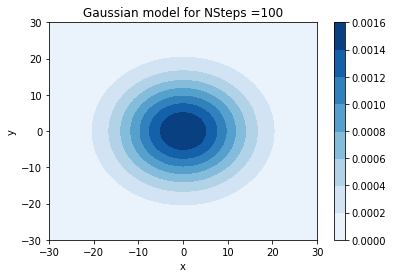

Chi^2 = 0.09969928207158059 for NSteps = 100


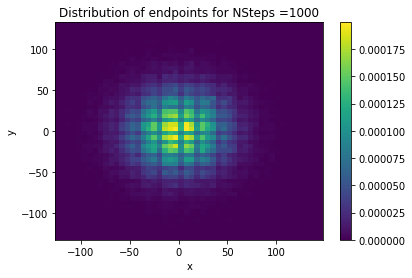

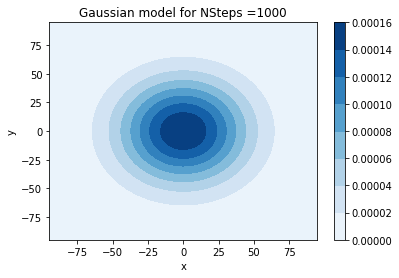

Chi^2 = 0.009637505907509464 for NSteps = 1000


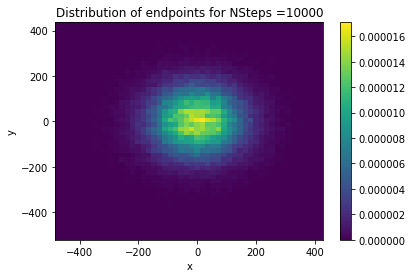

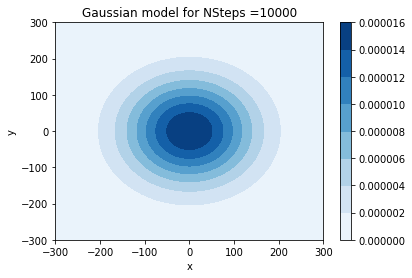

Chi^2 = 0.00015200074383210524 for NSteps = 10000


In [ ]:
L=1
W = 100000
yval = [0,1,2,3,4,5]
for i in yval:
    NSteps = 10**i
    test = TwoDHistogram(W,NSteps)
    plt.show()
sigma = np.sqrt(NSteps)    


With these graphs, as well as the chi^2, we can both visually and numerically see that the gaussian approximation becomes really good between NSteps = 10 and NSteps =100. We can see this with our chi^2 values, wherein it decreased by almost 4 orders of magnitude. For the rest of the iterations, the chi^2 only dropped by an order of magnitude, so this is significant. While I am not certain of what exactly the degrees of freedom of this system are, we can compare values on a relative basis. From a visual perspective, we are able to see that the density at certain x-values matches up between the model and the data. For example, in NSteps = 10^3, we can see that the model suggests that the tail of the gaussian begins near x = 45. In the data, we can also clearly see this dropoff near x = 45.  

## Plots for fun!
We are going to plot some cool random walks in 2 and 3 dimensions. This is super easy because we are passing dimensions as a parameter. All of the code is created such that we can do all of the relevant statistics on these objects just as we did in 1 and 2d. We shall find that we have RMS(N) = sqrt(3*N), average(N) = (0,0,0), and we could even fit the data of our endpoints to a 3-d gaussian. Applying randomStepsSpecial instead of randomSteps will result in a spiral. If you want, you can change the parameters of the spiral in the function.

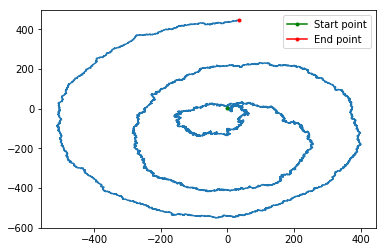

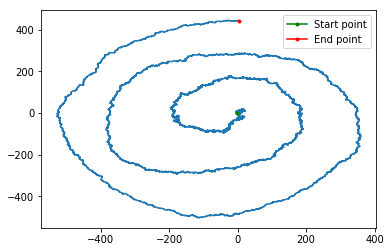

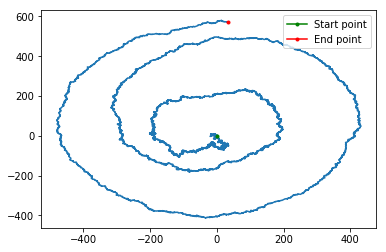

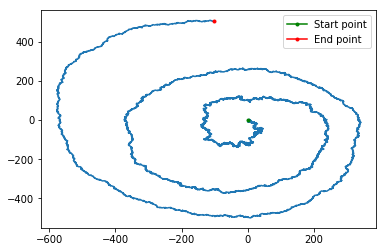

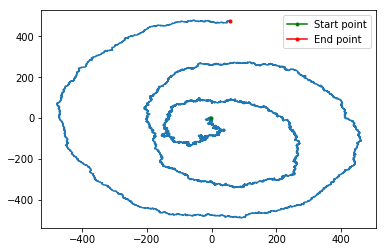

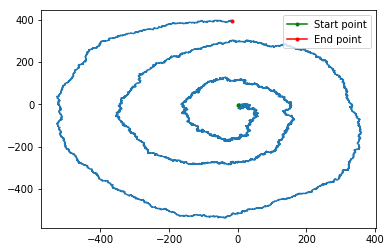

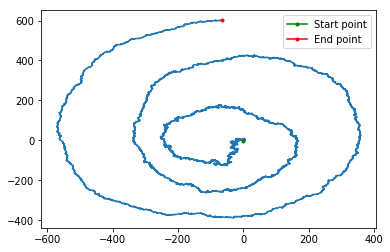

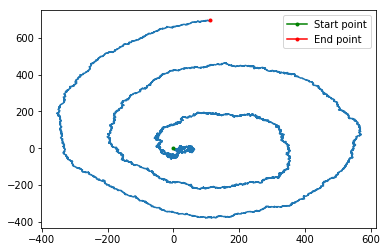

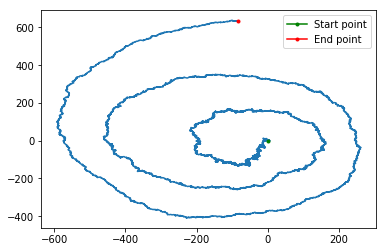

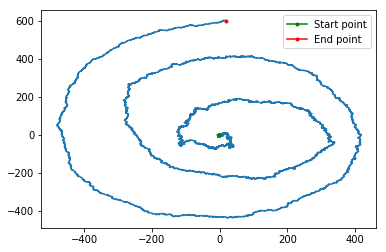

In [17]:
n_walks = 10
#This generates a series of 2-d walks
walks = manyWalksSpecial(10000,2,n_walks) #This uses the biased walking pattern, if you want to check that the regular one works, just call manyWalks(num_steps,dimensions,iterations) with the same arguments
for i in range(n_walks):
    plt.plot(walks[i][:,0],walks[i][:,1])
    plt.plot(walks[i][0][0], walks[i][0][1], marker='o', markersize=3, color="green",label = "Start point")
    plt.plot(walks[i][-1][0], walks[i][-1][1], marker='o', markersize=3, color="red",label = "End point")
    plt.legend()
    plt.show()

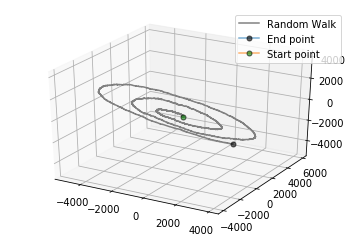

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ThreeDWalk = buildRandomWalk(randomStepsSpecial(100000,3))
z = ThreeDWalk[:,2]
x = ThreeDWalk[:,0]
y = ThreeDWalk[:,1]
ax.plot3D(x, y, z, 'gray',label = "Random Walk")
zend = ThreeDWalk[:,2][-1]
xend = ThreeDWalk[:,0][-1]
yend = ThreeDWalk[:,1][-1]
ax.plot([xend], [yend], [zend], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=5, alpha=0.6,label = "End point")

zstart = ThreeDWalk[:,2][0]
xstart = ThreeDWalk[:,0][0]
ystart = ThreeDWalk[:,1][0]
ax.plot([xstart], [ystart], [zstart], markerfacecolor='g', markeredgecolor='k', marker='o', markersize=5, alpha=0.6,label = "Start point")
plt.legend()